In [ ]:
# creating a directory named '.kaggle' in the root directory if it doesn't already exist
! mkdir ~/.kaggle

In [ ]:
# copying the 'kaggle.json' file to the '.kaggle' directory
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#changing the permissions of the 'kaggle.json' file to read-only (600)
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# downloading the breast histopathology images dataset from Kaggle
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [02:36<00:00, 23.5MB/s]
100% 3.10G/3.10G [02:36<00:00, 21.3MB/s]


In [ ]:
# mounting Google Drive to Colab for easy access and saving files directly to drive
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating a directory in the Google Drive to store the downloaded dataset
!mkdir -p 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/dataset/'

In [ ]:
!ls /content

breast-histopathology-images.zip  drive  sample_data


In [ ]:
# moving the downloaded zip file to the created directory
!mv '/content/breast-histopathology-images.zip' 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/dataset/'

In [ ]:
# creates a 'initialPath' directory in the '/content/dataset' directory
!mkdir -p /content/dataset/initialPath

In [ ]:
# creates a 'finalPath' directory in the '/content/dataset' directory
!mkdir -p /content/dataset/finalPath

In [ ]:
# this will extract the images of breast cancer cells to the initial path directory
! unzip -o "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/dataset/breast-histopathology-images" -d /content/dataset/initialPath


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/dataset/initialPath/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.p

In [ ]:
import os
# creating directories for output scripts
os.mkdir('/content/output')

In [ ]:
#also for utility scripts
os.mkdir('/content/utils')

In [ ]:
import importlib.util
# importing additional utility scripts for creating datasets, getting paths, and configurations
spec = importlib.util.spec_from_file_location("conv_bc_model", "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/conv_bc_model.py")
spec = importlib.util.spec_from_file_location("create_dataset", "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/utils/create_dataset.py")
spec = importlib.util.spec_from_file_location("getPaths", "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/utils/getPaths.py")
spec = importlib.util.spec_from_file_location("config", "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/config.py")

In [ ]:
# copying utility scripts from Google Drive to the current environment's utils directory
!cp "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/conv_bc_model.py" "/content/utils/conv_bc_model.py"
!cp "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/create_dataset.py" "/content/utils/create_dataset.py"
!cp "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/getPaths.py" "/content/utils/getPaths.py"
!cp "drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/utils/config.py" "/content/utils/config.py"

In [ ]:
# running the create_dataset script to prepare the dataset for training
! python /content/utils/create_dataset.py

555048
555048
Making 'training' split
'Creating /content/dataset/finalPath/training' directory
'creating /content/dataset/finalPath/training/0' directory
'creating /content/dataset/finalPath/training/1' directory
Making 'validation' split
'Creating /content/dataset/finalPath/validation' directory
'creating /content/dataset/finalPath/validation/0' directory
'creating /content/dataset/finalPath/validation/1' directory
Making 'testing' split
'Creating /content/dataset/finalPath/testing' directory
'creating /content/dataset/finalPath/testing/1' directory
'creating /content/dataset/finalPath/testing/0' directory


In [ ]:
# Setting up the matplotlib backend to allow saving of plots even if we are running in the background
import matplotlib
matplotlib.use("Agg")
%matplotlib inline

In [ ]:
!ls /content/utils

config.py  conv_bc_model.py  create_dataset.py	getPaths.py  __pycache__


In [ ]:
# importing the necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.optimizers import Adam
from utils import config
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
# Defining a function for plotting the count of data against each class in each directory
def plotData(dirPath):
    # Get the path to the benign and malignant sub-directories
    benign_cases_dir = dirPath+ '/0/'
    malignant_cases_dir = dirPath + '/1/'

    # Get the list of all the images
    benign_cases = glob.glob(benign_cases_dir + '*.png')
    malignant_cases = glob.glob(malignant_cases_dir + '*.png')

    # An empty list. We will insert the data into this list in (img_path, label) format
    data1 = []

    # Go through all the benign cases. The label for these cases will be 0
    for img in benign_cases:
        data1.append((img,0))

    # Go through all the malignant cases. The label for these cases will be 1
    for img in malignant_cases:
        data1.append((img, 1))

    # Get a pandas dataframe from the data we have in our list
    data1 = pd.DataFrame(data1, columns=['image', 'label'],index=None)

    # Shuffle the data
    data1 = data1.sample(frac=1.).reset_index(drop=True)



    # Get the counts for each class
    cases_count = data1['label'].value_counts()
    print(cases_count)

    # Plot the results
    plt.figure(figsize=(10,8))
    sns.barplot(x=cases_count.index, y= cases_count.values,palette = ['green','black'])
    plt.title('Number of cases', fontsize=14)
    plt.xlabel('Case type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(range(len(cases_count.index)), ['benign(0)', 'malignant(1)'])
    plt.show()

label
0    183062
1     72785
Name: count, dtype: int64


<ipython-input-28-50e365b1d046>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_count.index, y= cases_count.values,palette = ['green','black'])


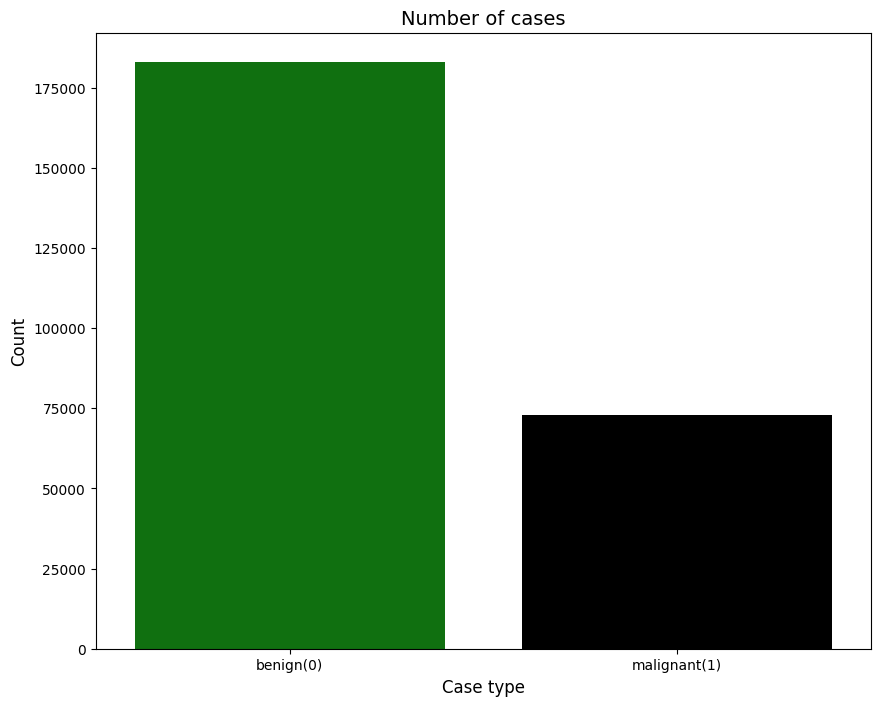

label
0    71710
1    28256
Name: count, dtype: int64


<ipython-input-28-50e365b1d046>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_count.index, y= cases_count.values,palette = ['green','black'])


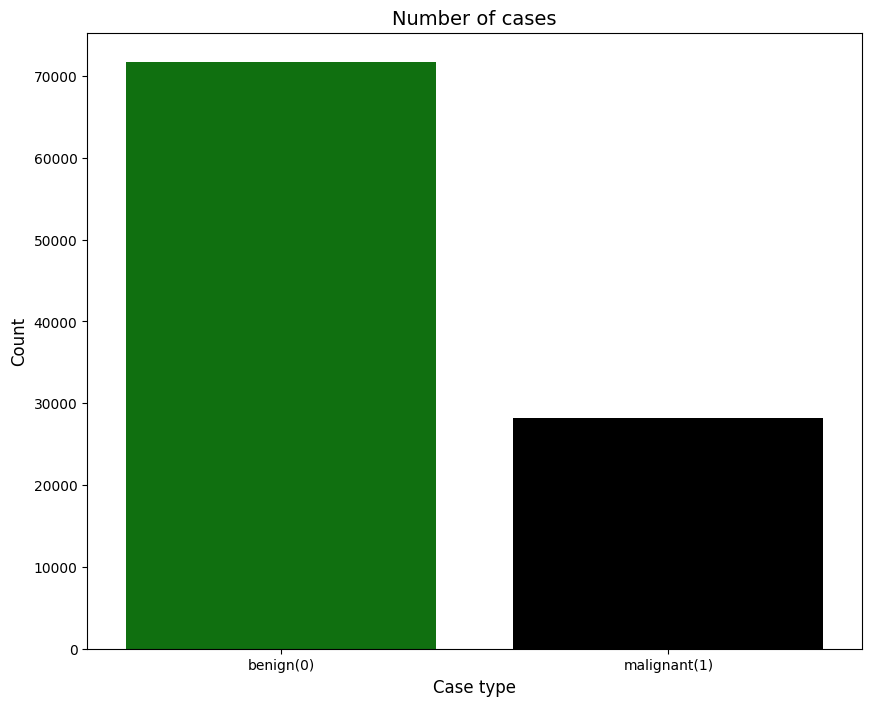

label
0    30551
1    12030
Name: count, dtype: int64


<ipython-input-28-50e365b1d046>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_count.index, y= cases_count.values,palette = ['green','black'])


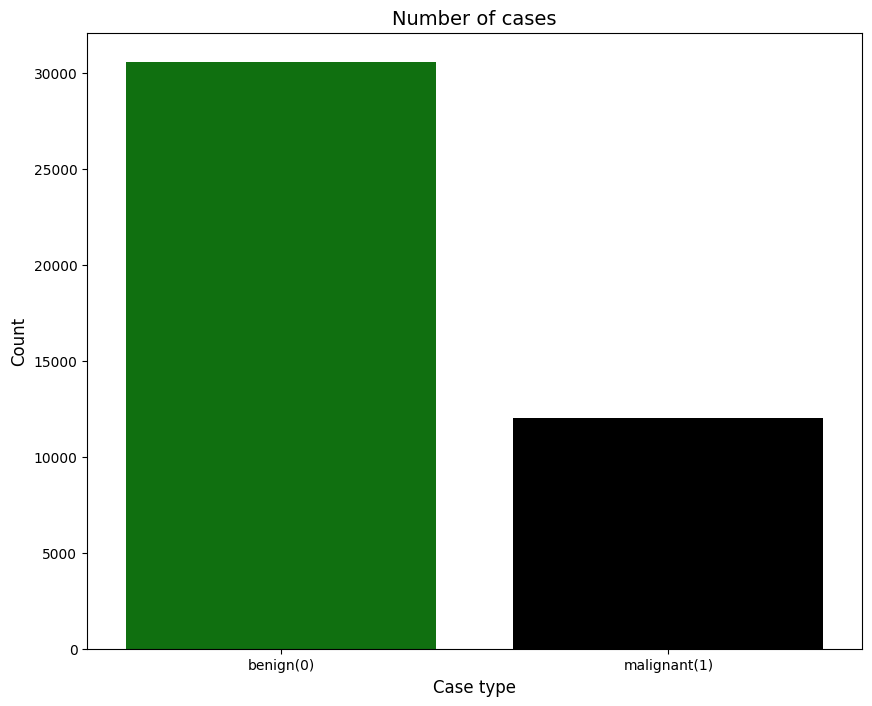

In [ ]:
# Plotting the data distribution for training, testing, and validation sets
plotData(config.TRAIN_PATH)
plotData(config.TEST_PATH)
plotData(config.VAL_PATH)

In [ ]:
# Get the path to the benign and malignant sub-directories in the training data
benign_cases_dir = config.TRAIN_PATH + '/0/'
malignant_cases_dir = config.TRAIN_PATH + '/1/'

# listing all the image files in the benign and malignant directories
benign_cases = glob.glob(benign_cases_dir + '*.png')
malignant_cases = glob.glob(malignant_cases_dir + '*.png')

# Creating an empty list to store the image paths and their corresponding labels
train_data1 = []

# Adding all benign images to the list with label 0
for img in benign_cases:
    train_data1.append((img,0))

# Adding all malignant images to the list with label 1
for img in malignant_cases:
    train_data1.append((img, 1))

# Converting the list to a pandas dataframe with columns for image paths and labels
train_data1 = pd.DataFrame(train_data1, columns=['image', 'label'],index=None)

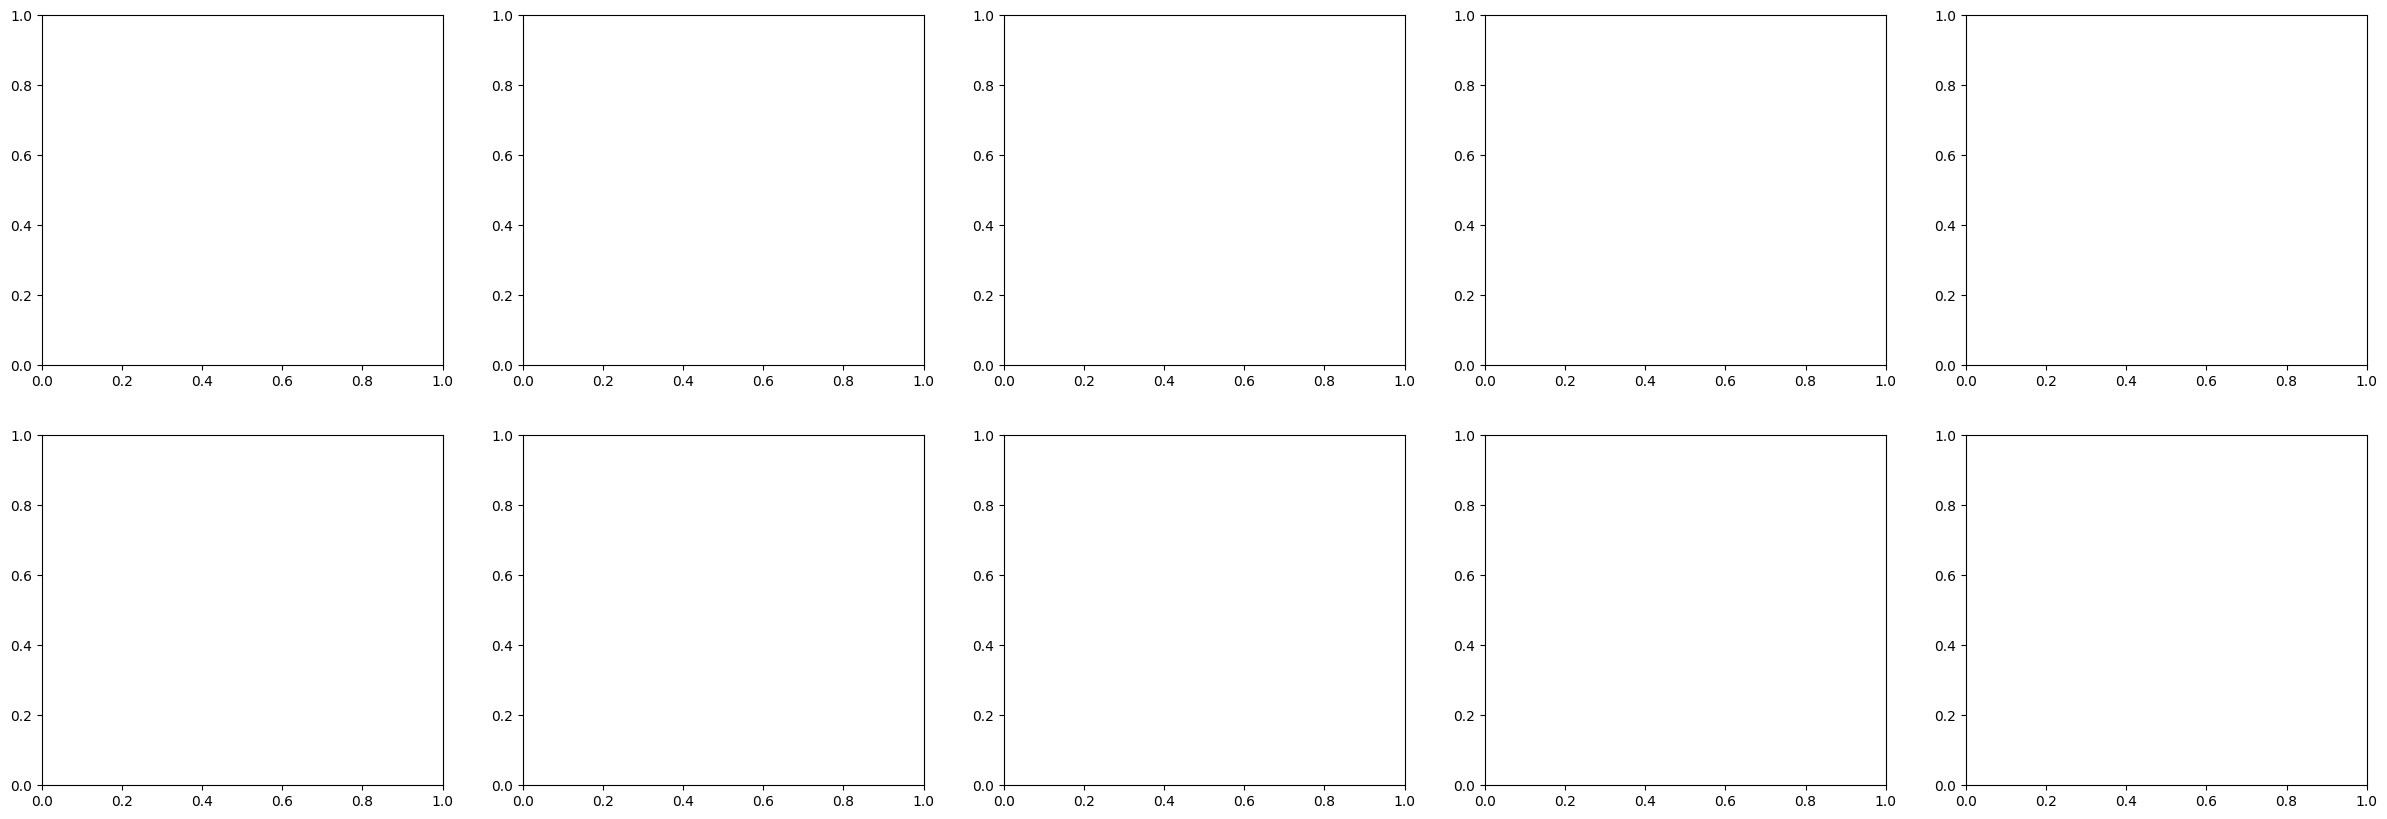

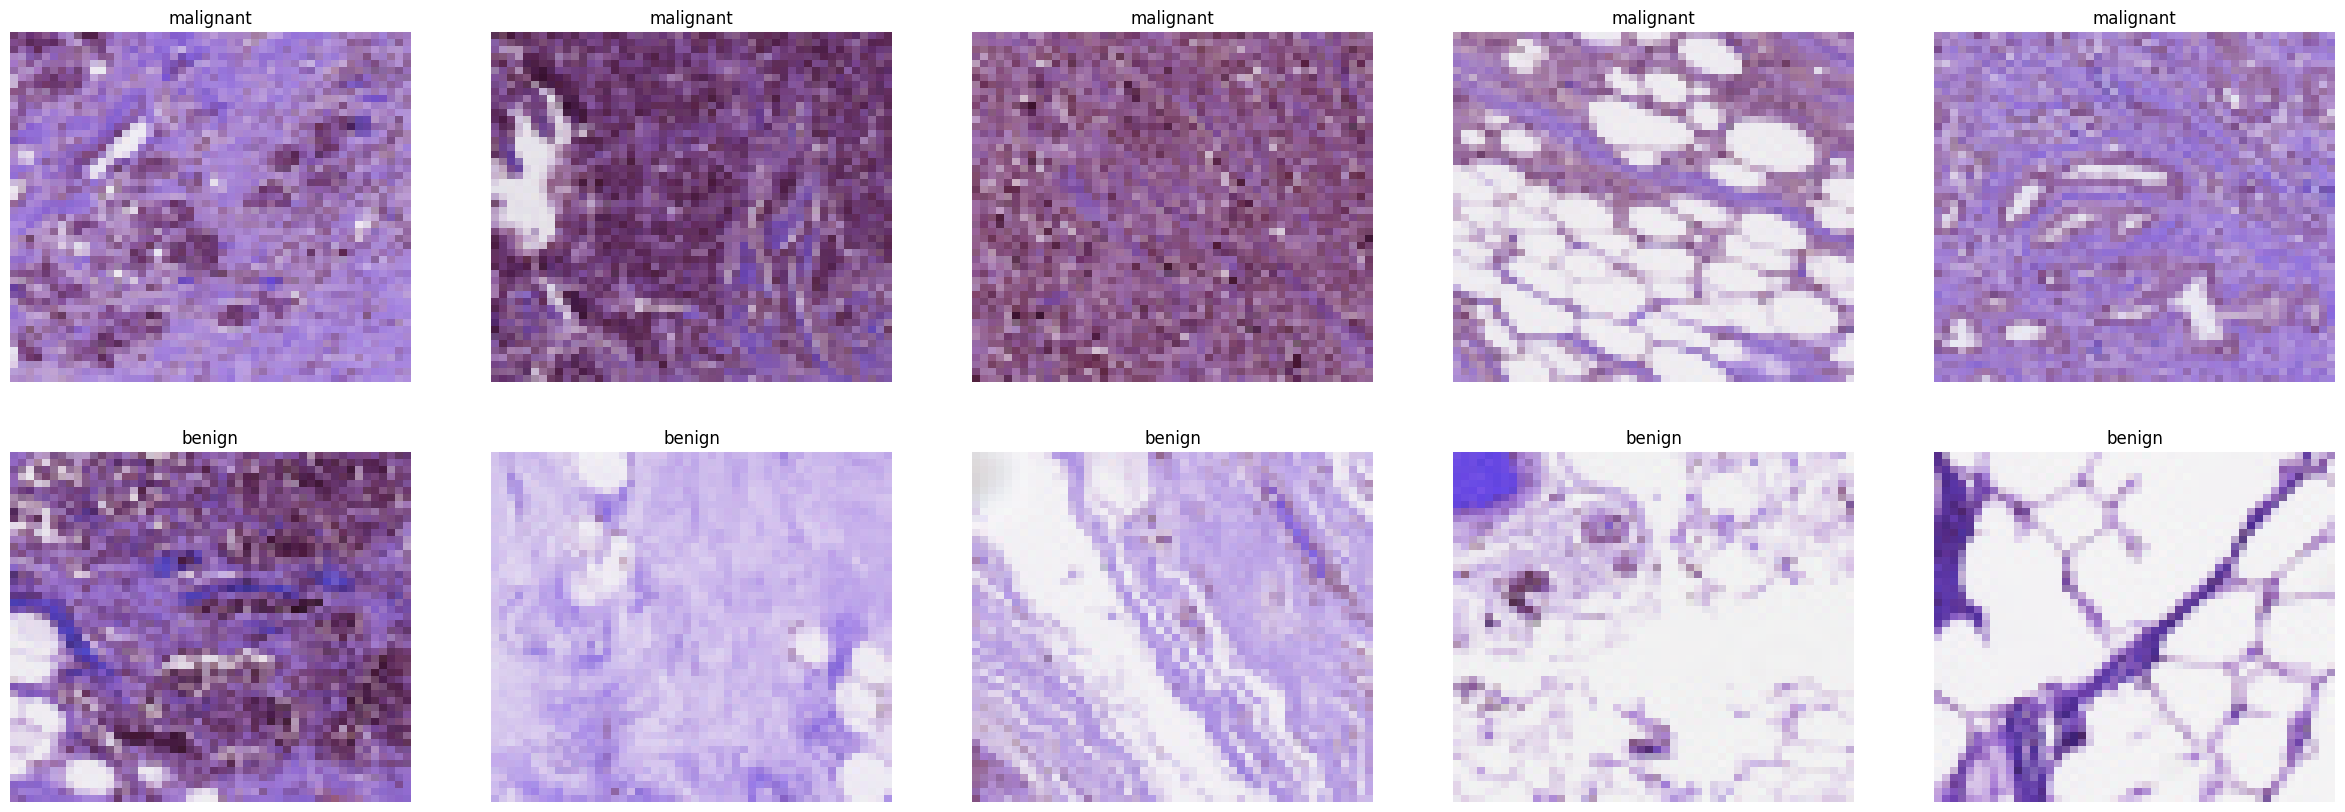

In [ ]:
# Selecting a few samples from both classes for visualization
malignant_samples = (train_data1[train_data1['label']==1]['image'].iloc[:5]).tolist()
benign_samples = (train_data1[train_data1['label']==0]['image'].iloc[:5]).tolist()

# Combining the samples into a single list and deleting the individual sample lists to save memory
samples = malignant_samples + benign_samples
del malignant_samples, benign_samples

# Plotting the selected samples to visualize benign and malignant images
f, ax = plt.subplots(2, 5, figsize=(30, 10))
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = cv2.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("malignant")
    else:
        ax[i//5, i%5].set_title("benign")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

from this, we see that we cannot really differentiate between a benign and a malignant case easily. Hence we would build a robust classifier to do this


In [ ]:
# method to get the number of files in a given path recursively
def retrieveNumberOfFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.png', recursive=True):
        list1.append(file_name)
    return len(list1)

In [ ]:
# Defining a method to plot training and validation accuracy and loss
def training_plot(H, N, plotPath):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plotPath)

In [ ]:
# Checking for the total number of image paths in training, validation and testing directories
totalTrain = retrieveNumberOfFiles(config.TRAIN_PATH)
totalVal = retrieveNumberOfFiles(config.VAL_PATH)
totalTest = retrieveNumberOfFiles(config.TEST_PATH)

In [ ]:
# Defining a method to get the number of files given a path
def getAllFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.png', recursive=True):
        list1.append(file_name)
    return list1

In [ ]:
# Retrieving all files from train directory
allTrainFiles = getAllFiles(config.TRAIN_PATH)

In [ ]:
# Calculating the total number of training images against each class and then store the class weights in a dictionary
trainLabels = [int(p.split(os.path.sep)[-2]) for p in allTrainFiles]
trainLabels = to_categorical(trainLabels)
classSumTotals = trainLabels.sum(axis=0)
classWeight = dict()

# Looping over all classes and calculate the class weights
for i in range(0, len(classSumTotals)):
    classWeight[i] = classSumTotals.max() / classSumTotals[i]

In [ ]:
# Initialize the training data augmentation object
## preprocess_input will scale input pixels between -1 and 1
## rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
## zoom_range is for randomly zooming inside pictures
## width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
## shear_range is for randomly applying shearing transformations
## horizontal_flip and vertical_flip is for randomly flipping half of the images horizontally and vertically resp
## fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

trainAug = ImageDataGenerator(
	preprocessing_function=preprocess_input,
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

In [ ]:
# Initialize the validation data augmentation object
valAug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# As per the preprocessing step
# defining the ImageNet mean subtraction in RGB order and setting the
# mean subtraction values for each of the data augmentation objects
# mean = np.array([123.68, 116.779, 103.939], dtype="float32")
# trainAug.mean = mean
# valAug.mean = mean

In [ ]:
# Initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=True,
	batch_size=config.BATCH_SIZE)

Found 255847 images belonging to 2 classes.


In [ ]:
# Initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 42581 images belonging to 2 classes.


In [ ]:
# Initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BATCH_SIZE)

Found 99966 images belonging to 2 classes.


In [ ]:
# Loading the ResNet50, ensuring the head Full Connected layers are left off / removed
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(48, 48, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Printing the baseModel layers after removing the head
baseModel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Constructing the head of the model that will be placed on top of the the base model
## We flatten the output of the convolutional layers to create a single long feature vector.
# Average pooling computes the average of the elements present in the region of feature map covered by the filter.
# The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7), padding="same")(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(config.CLASSES), activation="sigmoid")(headModel)

In [ ]:
# Placing the head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# Loop over all the layers of the base model and freeze them so that they are
# not updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# Printing all the layers of the model to check whether the baseModel layers are changed to not trainable
for layer in model.layers:
    print("{}: {}".format(layer, layer.trainable))

<InputLayer name=input_layer, built=True>: False
<ZeroPadding2D name=conv1_pad, built=True>: False
<Conv2D name=conv1_conv, built=True>: False
<BatchNormalization name=conv1_bn, built=True>: False
<Activation name=conv1_relu, built=True>: False
<ZeroPadding2D name=pool1_pad, built=True>: False
<MaxPooling2D name=pool1_pool, built=True>: False
<Conv2D name=conv2_block1_1_conv, built=True>: False
<BatchNormalization name=conv2_block1_1_bn, built=True>: False
<Activation name=conv2_block1_1_relu, built=True>: False
<Conv2D name=conv2_block1_2_conv, built=True>: False
<BatchNormalization name=conv2_block1_2_bn, built=True>: False
<Activation name=conv2_block1_2_relu, built=True>: False
<Conv2D name=conv2_block1_0_conv, built=True>: False
<Conv2D name=conv2_block1_3_conv, built=True>: False
<BatchNormalization name=conv2_block1_0_bn, built=True>: False
<BatchNormalization name=conv2_block1_3_bn, built=True>: False
<Add name=conv2_block1_add, built=True>: False
<Activation name=conv2_block1_

In [ ]:
import tensorflow as tf

# Compiling the model
print("Compiling model")

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=config.INIT_LR,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])



Compiling model


In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Using ModelCheckpoint to store the best model based on val_loss
MCName = os.path.sep.join([config.outputPath, "weights-{epoch:03d}-{val_loss:.4f}.keras"])
checkpoint = ModelCheckpoint(MCName, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]


In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9



In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#Fitting the model on training data
#print("Model Fitting")
MF = model.fit(
	x = trainGen,
	steps_per_epoch=totalTrain // config.BATCH_SIZE,
	validation_data=valGen,
	validation_steps=totalVal // config.BATCH_SIZE,
	class_weight=classWeight,
	epochs=config.EPOCHS,
	callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7990/7995 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7819 - loss: 0.7251
Epoch 1: val_loss improved from inf to 0.46270, saving model to /content/output/weights-001-0.4627.keras
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 402s 49ms/step - accuracy: 0.7819 - loss: 0.7251 - val_accuracy: 0.7934 - val_loss: 0.4627
Epoch 2/20
   1/7995 ━━━━━━━━━━━━━━━━━━━━ 1:10 9ms/step - accuracy: 0.7188 - loss: 0.8498

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.46270 to 0.38073, saving model to /content/output/weights-002-0.3807.keras
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 5s 591us/step - accuracy: 0.7188 - loss: 0.8498 - val_accuracy: 0.8095 - val_loss: 0.3807
Epoch 3/20
7990/7995 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8155 - loss: 0.6033
Epoch 3: val_loss did not improve from 0.38073
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 375s 47ms/step - accuracy: 0.8155 - loss: 0.6033 - val_accuracy: 0.7913 - val_loss: 0.4598
Epoch 4/20
   1/7995 ━━━━━━━━━━━━━━━━━━━━ 1:01 8ms/step - accuracy: 0.8438 - loss: 0.5674
Epoch 4: val_loss improved from 0.38073 to 0.33547, saving model to /content/output/weights-004-0.3355.keras
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 1s 97us/step - accuracy: 0.8438 - loss: 0.5674 - val_accuracy: 0.8095 - val_loss: 0.3355
Epoch 5/20
7990/7995 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8173 - loss: 0.5910
Epoch 5: val_loss did not improve from 0.33547
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 376s 47ms/step - accuracy

In [ ]:
# Loading the best performing model
print("Picking the best performing model")
path1 = config.outputPath + '/weights-004-0.3355.keras'
fModel = load_model(path1)


Picking the best performing model


In [ ]:
# Predicting on the test data
print("Predicting on the test data")
predTest = fModel.predict(x=testGen, steps=(totalTest // config.BATCH_SIZE)+1)
predTest = np.argmax(predTest, axis=1)

Predicting on the test data
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step


In [ ]:
# Printing the Classification Report
print(classification_report(testGen.classes, predTest, target_names=testGen.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     71710
           1       0.59      0.88      0.70     28256

    accuracy                           0.79     99966
   macro avg       0.76      0.82      0.77     99966
weighted avg       0.84      0.79      0.80     99966



In [ ]:
# Computing the confusion matrix and and using the same to derive the
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testGen.classes, predTest)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Printing the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[54309 17401]
 [ 3443 24813]]
acc: 0.7915
sensitivity: 0.7573
specificity: 0.8781


In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(testGen.classes, predTest)
print("XGboost roc_value: {0}" .format(XGB_roc_value))

XGboost roc_value: 0.8177459228674132


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

def training_plot(metrics, epochs, plot_path):
    # Extract metrics
    train_loss = metrics.history.get('loss', [])
    val_loss = metrics.history.get('val_loss', [])
    train_acc = metrics.history.get('accuracy', [])
    val_acc = metrics.history.get('val_accuracy', [])

    # Check if metrics are populated
    if not train_loss and not val_loss and not train_acc and not val_acc:
        print("No data found in metrics history.")
        return

    # Print metrics for debugging
    print(f"train_loss: {train_loss}")
    print(f"val_loss: {val_loss}")
    print(f"train_acc: {train_acc}")
    print(f"val_acc: {val_acc}")

    # Plotting logic
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    if train_loss:
        plt.plot(range(epochs), train_loss, label='Training Loss')
    if val_loss:
        plt.plot(range(epochs), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.title('Training and Validation Loss')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    if train_acc:
        plt.plot(range(epochs), train_acc, label='Training Accuracy')
    if val_acc:
        plt.plot(range(epochs), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Training and Validation Accuracy')

    # Print plot path
    print(f"Saving plot to: {plot_path}")

    # Save the plot
    plt.savefig(plot_path)
    plt.close()

# Plotting the graph
training_plot(MF, config.EPOCHS, config.PLOT_PATH)

train_loss: [0.6485942006111145, 0.8497920632362366, 0.5978108644485474, 0.5673506855964661, 0.5853835940361023, 0.440865695476532, 0.5793878436088562, 0.5003448724746704, 0.5744389891624451, 0.5023605823516846, 0.5706191658973694, 0.7611981630325317, 0.5677614808082581, 0.5379284024238586, 0.565025269985199, 0.21862028539180756, 0.56402188539505, 0.7315802574157715, 0.5612785220146179, 0.6711542010307312]
val_loss: [0.4626997113227844, 0.38073495030403137, 0.4597695767879486, 0.3354693353176117, 0.45973607897758484, 0.3187844753265381, 0.44829061627388, 0.33555495738983154, 0.41133037209510803, 0.37807077169418335, 0.43514513969421387, 0.33989933133125305, 0.4155462384223938, 0.36318883299827576, 0.4449410140514374, 0.3342958092689514, 0.41688770055770874, 0.3745047152042389, 0.421762615442276, 0.36086660623550415]
train_acc: [0.8020913600921631, 0.71875, 0.8174383640289307, 0.84375, 0.8198933005332947, 0.875, 0.822989284992218, 0.875, 0.8236147165298462, 0.75, 0.8257764577865601, 0.8

In [ ]:
# Serialize/Writing the model to disk
print("Serializing network...")
fModel.save(config.MODEL_PATH + ".keras")

Serializing network...


In [ ]:
!cp '/content/output/weights-006-0.3188.keras' 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/output'

In [ ]:
cp '/content/output/weights-001-0.4627.keras' 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/output'

In [ ]:
!cp '/content/output/weights-002-0.3807.keras' 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/output

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
cp '/content/output/weights-004-0.3355.keras' 'drive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/code/output'